In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

Problem Statement: To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset. (Along with other ML algorithms, Naïve Bayes’ Classifier should be applied) Also, if some data pre-processing is necessary do that as well. 

In [2]:
data=pd.read_csv('mushrooms.csv')


In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.shape

(8124, 23)

Pre-processing 

In [5]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
data["class"].unique()

array(['p', 'e'], dtype=object)

In [8]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [9]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [ ]:
# datatypes are object so before applying Label Encoder , have to change the type to ‘category’.

In [10]:
data=data.astype('category')
data.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [ ]:
#Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for column in data.columns:
    data[column]=l.fit_transform(data[column])

In [12]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [ ]:
#from the above details its clear that 'veil-type' has only one unique value and hence won't contribute anything to the data. So drop it

In [13]:
data=data.drop(['veil-type'],axis=1)

In [ ]:
#splitting the data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
y=data['class'].values

In [16]:
x=data.drop(['class'],axis=1)

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

In [19]:
x_train.shape

(6499, 21)

In [20]:
y_train.shape

(6499,)

In [21]:
x_test.shape

(1625, 21)

In [22]:
y_test.shape

(1625,)

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [18]:
#building the model

#1.Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="liblinear")
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("Accuracy is:",round(accuracy_score(y_test,y_pred)*100,2))

confusion_matrix(y_test,y_pred)

Accuracy is: 95.51


array([[814,  32],
       [ 41, 738]], dtype=int64)

#2-KNN Classification

In [27]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(1,15)
#loop for creating KNN for all the values
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')#no of neighbors and method to find distance
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)#append the list to find max accuracy
    acc_values.append(acc)

In [28]:
acc_values

[1.0,
 1.0,
 1.0,
 0.9987692307692307,
 0.9993846153846154,
 0.9993846153846154,
 0.9987692307692307,
 0.9987692307692307,
 0.9975384615384615,
 0.9969230769230769,
 0.9969230769230769,
 0.9956923076923077,
 0.9950769230769231,
 0.9938461538461538]

Text(0, 0.5, 'accuaracy')

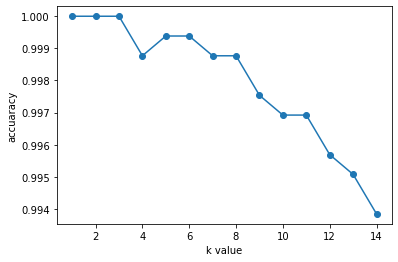

In [29]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuaracy')

In [ ]:
#maximum accuracy 100 for k value=1,2,3

In [42]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(x_train,y_train) 
y_pred=model.predict(x_test)
print("Accuracy is:",round(accuracy_score(y_test,y_pred)*100,2))
confusion_matrix(y_test,y_pred)

Accuracy is: 100.0


array([[846,   0],
       [  0, 779]], dtype=int64)

#3-Decision Tree Classification

In [37]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print("Accuracy is:",round(accuracy_score(y_test,y_pred)*100,2))
confusion_matrix(y_test,y_pred)

Accuracy is: 100.0


array([[846,   0],
       [  0, 779]], dtype=int64)

#4-Random Forest Classification

In [43]:
from sklearn.ensemble import RandomForestClassifier

rft=RandomForestClassifier(n_estimators=500,max_depth=10,random_state=42,criterion='entropy')
rft.fit(x_train,y_train)
y_pred=rft.predict(x_test)
print("Accuracy is:",round(accuracy_score(y_test,y_pred)*100,2))

Accuracy is: 100.0


#5-SVM Classification

In [41]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)
print("Accuracy is:",round(accuracy_score(y_test,y_pred)*100,2))

Accuracy is: 99.38


#6-Naive Bayes Classification 

In [35]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
print("Accuracy is:",round(accuracy_score(y_test,y_pred)*100,2))

Accuracy is: 91.88
